In [13]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(0)

In [ ]:
# Feature lists
features = ['mid_price_first', 'mid_price_last', 'mid_price_high', 'mid_price_low',
       'mean_mid_price', 'std_mid_price', 'best_bid_price',
       'mean_best_bid_price', 'std_best_bid_price', 'best_ask_price',
       'mean_best_ask_price', 'std_best_ask_price', 'best_bid_size',
       'mean_best_bid_size', 'std_best_bid_size', 'best_ask_size',
       'mean_best_ask_size', 'std_best_ask_size', 'mean_second_bid_ask_spread',
       'mean_second_bid_price', 'bid_ask_spread', 'mid_price_variation',
       'mid_price_variation_class', 'total_bid_volume', 'total_ask_volume',
       'mean_order_book_imbalance', 'mean_volume_ratio_bid_ask',
       'total_net_order_flow', 'num_added_orders', 'num_canceled_orders',
       'num_traded_orders', 'order_book_imbalance_5s', 'volume_ratio_5s',
       'order_flow_5s', 'trade_open', 'trade_close', 'trade_high', 'trade_low',
       'time_since_open', 'is_monday', 'is_friday'
]

In [ ]:
sampling_rate = "1s"
prediction_column = "mid_price_variation_class"
batch_size = 16
look_back = 32

In [16]:
from tf_preprocessing import process_and_combine_data

start_date = "2024-10-02"
end_date = "2024-10-04"

all_data = process_and_combine_data(start_date, end_date, data_folder="../AAPL_data", sampling_rate=sampling_rate)

print(all_data.columns)

all_data.head()

Index(['mid_price_first', 'mid_price_last', 'mid_price_high', 'mid_price_low',
       'mean_mid_price', 'std_mid_price', 'best_bid_price',
       'mean_best_bid_price', 'std_best_bid_price', 'best_ask_price',
       'mean_best_ask_price', 'std_best_ask_price', 'best_bid_size',
       'mean_best_bid_size', 'std_best_bid_size', 'best_ask_size',
       'mean_best_ask_size', 'std_best_ask_size', 'mean_second_bid_ask_spread',
       'mean_second_bid_price', 'bid_ask_spread', 'mid_price_variation',
       'mid_price_variation_class', 'total_bid_volume', 'total_ask_volume',
       'mean_order_book_imbalance', 'mean_volume_ratio_bid_ask',
       'total_net_order_flow', 'num_added_orders', 'num_canceled_orders',
       'num_traded_orders', 'order_book_imbalance_5s', 'volume_ratio_5s',
       'order_flow_5s', 'trade_open', 'trade_close', 'trade_high', 'trade_low',
       'ADX_5', 'ADX_7', 'ADX_10', 'DMP_5', 'DMP_10', 'DMN_5', 'DMN_10',
       'AROONU_7', 'AROOND_7', 'OLL3', 'OLL5', 'OLL10', 'OLL

,mid_price_first,mid_price_last,mid_price_high,mid_price_low,mean_mid_price,std_mid_price,best_bid_price,mean_best_bid_price,std_best_bid_price,best_ask_price,...,MA20dSTD,CO,C1O1,C2O2,C3O3,range,OH1,time_since_open,is_monday,is_friday
ts_recv,,,,,,,,,,,,,,,,,,,,,
2024-10-02 09:30:15.500000-04:00,225.785,225.815,225.815,225.780,225.799767,0.013045,225.79,225.767442,0.016049,225.84,...,0.087152,0.030,0.000,0.060,0.005,0.035,0.000,15.5,0,0
2024-10-02 09:30:17-04:00,225.835,225.840,225.840,225.815,225.827941,0.009427,225.81,225.799647,0.007146,225.87,...,0.062713,0.005,0.030,0.000,0.060,0.025,0.030,17.0,0,0
2024-10-02 09:30:17.500000-04:00,225.840,225.840,225.845,225.825,225.835833,0.005248,225.82,225.812179,0.005259,225.86,...,0.063521,0.000,0.005,0.030,0.000,0.020,0.005,17.5,0,0
2024-10-02 09:30:18-04:00,225.840,225.830,225.845,225.825,225.834902,0.006595,225.81,225.808235,0.007129,225.85,...,0.055495,-0.010,0.000,0.005,0.030,0.020,0.005,18.0,0,0
2024-10-02 09:30:18.500000-04:00,225.825,225.780,225.830,225.775,225.794952,0.016180,225.75,225.774571,0.019711,225.81,...,0.055424,-0.045,-0.010,0.000,0.005,0.055,0.005,18.5,0,0


In [17]:
all_data.mid_price_variation_class.value_counts()

mid_price_variation_class
2.0    20736
0.0    19337
1.0    11289
Name: count, dtype: int64

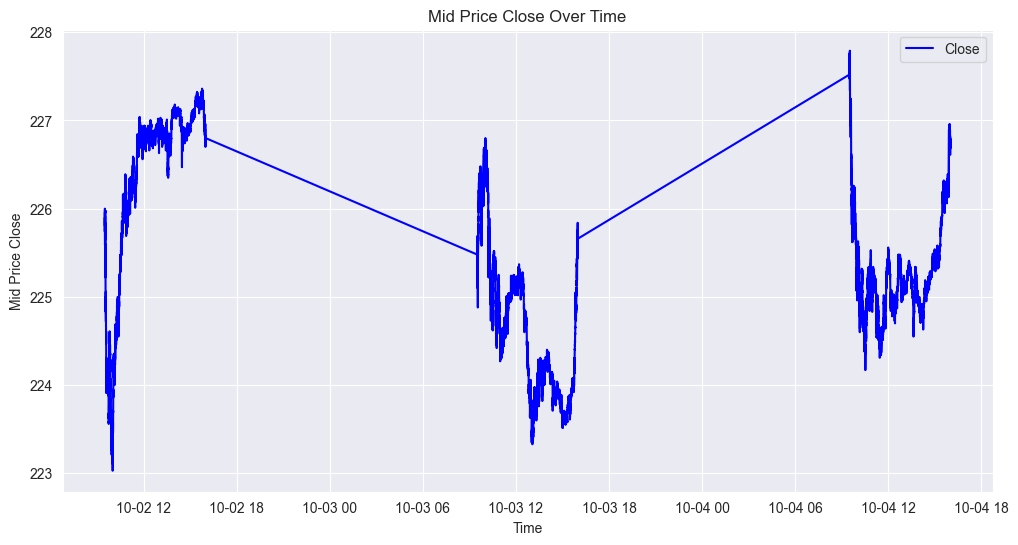

In [18]:
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
plt.plot(all_data.index, all_data["trade_close"], label="Close", color="blue")
plt.xlabel("Time")
plt.ylabel("Mid Price Close")
plt.title("Mid Price Close Over Time")
plt.legend()
plt.show()

In [19]:
# Data Splitting
train_size = int(len(all_data) * 0.7)
val_size = int(len(all_data) * 0.1)
test_size = len(all_data) - train_size - val_size

train_df = all_data.iloc[:train_size, :]
val_df = all_data.iloc[train_size:train_size + val_size, :]
test_df = all_data.iloc[train_size + val_size:, :]

In [ ]:
from time_series_generators import TimeSeriesGenerator, TimeSeriesScalerGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Fit scalers on training data only
minmax_scaler = MinMaxScaler(feature_range=(0, 1)).fit(train_df[features])

# Apply scalers to training, validation, and test sets
train_scaled = minmax_scaler.transform(train_df[features])
val_scaled = minmax_scaler.transform(val_df[features])
test_scaled = minmax_scaler.transform(test_df[features])

# Extract targets separately
train_target = train_df[prediction_column].values
val_target = val_df[prediction_column].values
test_target = test_df[prediction_column].values

# Create generators with pre-scaled data
train_gen = TimeSeriesGenerator(train_scaled, train_target, look_back=look_back, batch_size=batch_size)
val_gen = TimeSeriesGenerator(val_scaled, val_target, look_back=look_back, batch_size=batch_size)
test_gen = TimeSeriesGenerator(test_scaled, test_target, look_back=look_back, batch_size=batch_size)

In [21]:
from keras import layers, models, optimizers

def create_model():
    input_size = len(features)
    inputs = layers.Input(shape=(look_back, input_size))

    # First LSTM layer
    x = layers.LSTM(128, return_sequences=True)(inputs)
    x = layers.BatchNormalization()(x)

    # Second LSTM layer
    x = layers.LSTM(64, return_sequences=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Dense layers
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(3, activation="softmax")(x)

    # Create model
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

num_models = 1
epochs = 3
all_predictions = []

for i in range(num_models):
    model = create_model()
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, 
                  loss="sparse_categorical_crossentropy", 
                  metrics=["accuracy"])
    
    model.fit(train_gen, validation_data=val_gen, epochs=epochs)
    
    predictions = model.predict(test_gen)
    all_predictions.append(predictions)


Epoch 1/3
2246/2246 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.4660 - loss: 1.0633 - val_accuracy: 0.4126 - val_loss: 9.2769
Epoch 2/3
2246/2246 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.4895 - loss: 1.0239 - val_accuracy: 0.4120 - val_loss: 11.7762
Epoch 3/3
2246/2246 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.4990 - loss: 1.0117 - val_accuracy: 0.3828 - val_loss: 1.4107
641/641 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def plot_evaluation_metrics(y_true, y_pred, log_probabilities):
    probabilities = np.exp(log_probabilities)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Confusion Matrix (updated for 3 classes)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        ax=axes[0],
        xticklabels=["Down (0)", "Constant (1)", "Up (2)"],  # Updated class labels with meaning
        yticklabels=["Down (0)", "Constant (1)", "Up (2)"],  # Updated class labels with meaning
    )
    axes[0].set_title("Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("True")

    # Histogram of Predicted Probabilities (updated for 3 classes)
    for i, class_label in enumerate(["Down (0)", "Constant (1)", "Up (2)"]):  # Updated class labels with meaning
        sns.histplot(
            probabilities[y_true == i][:, i], bins=30, label=class_label, ax=axes[1]
        )
    axes[1].set_title("Probability Distribution")
    axes[1].set_xlabel("Predicted Probability")
    axes[1].legend()

    # Scatter Plot of Predictions (updated for 3 classes)
    scatter = sns.scatterplot(
        x=np.arange(len(probabilities)),
        y=probabilities.max(axis=1),
        hue=y_true,
        palette={0: "red", 1: "blue", 2: "green"},  # Updated palette for 0, 1, 2
        alpha=0.7,
        ax=axes[2],
    )
    axes[2].set_title("Scatter Plot of Predictions")
    axes[2].set_xlabel("Sample Index")
    axes[2].set_ylabel("Max Predicted Probability")

    handles, labels = scatter.get_legend_handles_labels()
    new_labels = ["Down (0)", "Constant (1)", "Up (2)"]  # Updated class labels with meaning
    axes[2].legend(handles, new_labels, title="True Class")

    axes[2].tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

    # Print Evaluation Metrics
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred, zero_division=0))

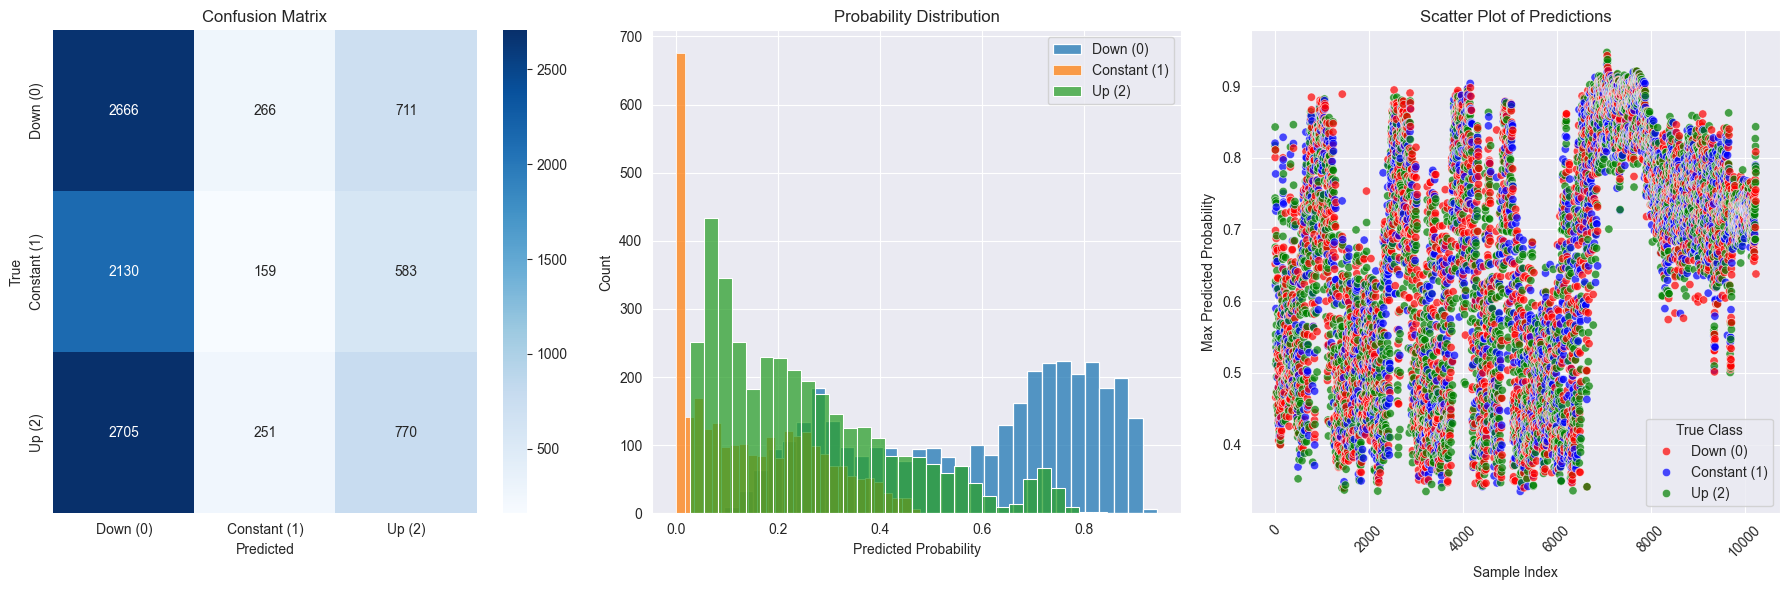

Accuracy: 0.3510
              precision    recall  f1-score   support

           0       0.36      0.73      0.48      3643
           1       0.24      0.06      0.09      2872
           2       0.37      0.21      0.27      3726

    accuracy                           0.35     10241
   macro avg       0.32      0.33      0.28     10241
weighted avg       0.33      0.35      0.29     10241



In [23]:
# Convert predictions to class labels
all_predictions = np.array(all_predictions)
predicted_classes = np.argmax(all_predictions, axis=-1)

# Majority voting
final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predicted_classes)

# Compute log probabilities for evaluation
log_probabilities = np.log(np.mean(all_predictions, axis=0))

# Evaluate the final predictions
y_true = test_gen.true_labels  # Assuming test_gen has the true labels
plot_evaluation_metrics(y_true, final_predictions, log_probabilities)

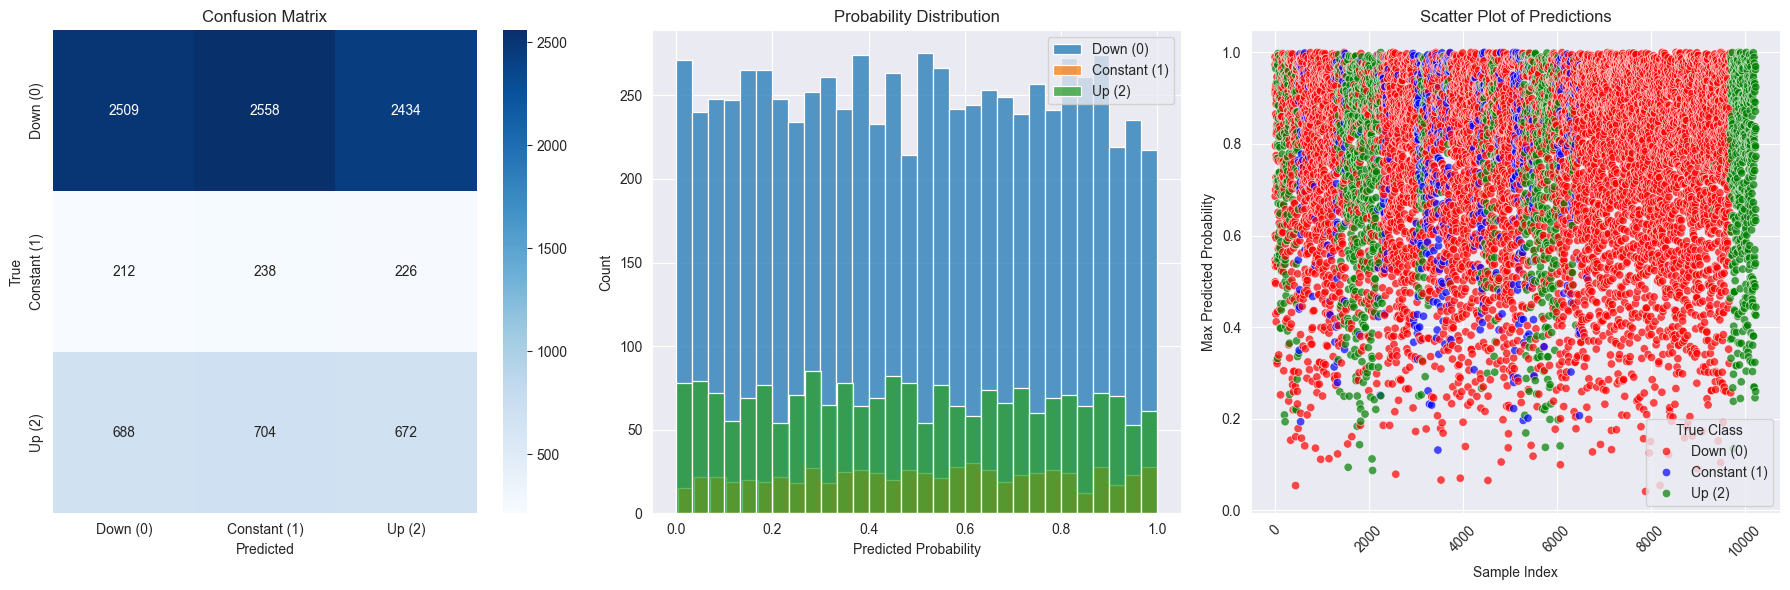

Accuracy: 0.3339
              precision    recall  f1-score   support

           0       0.74      0.33      0.46      7501
           1       0.07      0.35      0.11       676
           2       0.20      0.33      0.25      2064

    accuracy                           0.33     10241
   macro avg       0.34      0.34      0.27     10241
weighted avg       0.58      0.33      0.39     10241



In [24]:
# Implement a random strategy
random_y_pred = np.random.randint(0, 3, size=len(final_predictions))
random_log_probabilities = np.log(np.random.rand(len(final_predictions), 3))

# Plot evaluation metrics for the random strategy
plot_evaluation_metrics(final_predictions, random_y_pred, random_log_probabilities)